# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
# optimization
from tensorflow.keras.optimizers import Adam
# metrics
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error

import os
import glob as g
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Read Dataset

In [2]:
dataset_path = './dataset/'

In [3]:
csv_files = g.glob(dataset_path + '*.csv')
csv_files

['./Q1_dataset\\PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Changping_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Dingling_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Dongsi_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Guanyuan_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Gucheng_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Huairou_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Shunyi_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Tiantan_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Wanliu_20130301-20170228.csv',
 './Q1_dataset\\PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [4]:
station_name = [i.split('_')[-2] for i in csv_files]
station_name

['Aotizhongxin',
 'Changping',
 'Dingling',
 'Dongsi',
 'Guanyuan',
 'Gucheng',
 'Huairou',
 'Nongzhanguan',
 'Shunyi',
 'Tiantan',
 'Wanliu',
 'Wanshouxigong']

In [5]:
# save all csv files in one dictionary
# load with time as a index
data = {}
for index, csv in enumerate(csv_files):
    data[station_name[index]] = pd.read_csv(csv,
                                    index_col=0,
                                    date_parser=lambda x: datetime.strptime(x, '%Y %m %d %H'),
                                    parse_dates=[['year', 'month', 'day', 'hour']])

In [6]:
data['Aotizhongxin']

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28 20:00:00,35061,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28 21:00:00,35062,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


In [7]:
data_Aotizhongxin = data['Aotizhongxin']
data_Aotizhongxin.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# Preprocessing

In [8]:
data_Aotizhongxin.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [9]:
# Check for missed value
data_Aotizhongxin.isnull().values.any()

True

### 3.1) Missing value
replace missing value with linear interpolation method

In [10]:
data_Aotizhongxin = data_Aotizhongxin.interpolate(method="linear")

In [11]:
# Check for missed value
data_Aotizhongxin.isnull().values.any()

True

### 3.2) Encoding Categorical Variable 
change wind direction to degree

In [12]:
def wd_to_degree(wd):
    if wd == "N":
        d = 0 
    elif wd == "NNE":
        d = 22.5
    elif wd == "NE":
        d = 45
    elif wd == "ENE":
        d = 67.5    
    elif wd == "E":
        d = 90
    elif wd == "ESE":
        d = 112.5
    elif wd == "SE":
        d = 135   
    elif wd == "SSE":
        d = 157.5 
    elif wd == "S":
        d = 180  
    elif wd == "SSW":
        d = 202.5  
    elif wd == "SW":
        d = 225
    elif wd == "WSE":
        d = 247.5
    elif wd == "W":
        d = 270  
    elif wd == "WNW":
        d = 292.5
    elif wd == "NW":
        d = 315
    elif wd == "NNW":
        d = 337.5  
    else:
        d = 0  
    return d

In [13]:
data_Aotizhongxin["wd"]  = data_Aotizhongxin["wd"] .apply(lambda x: wd_to_degree(x))
data_Aotizhongxin.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4,Aotizhongxin
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7,Aotizhongxin
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6,Aotizhongxin
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1,Aotizhongxin
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0,Aotizhongxin


In [14]:
# Dropping useless columns
data_Aotizhongxin.drop(['No', 'SO2', 'NO2', 'O3', 'station'], axis=1, inplace=True)
data_Aotizhongxin.head()

,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,300.0,-0.7,1023.0,-18.8,0.0,337.5,4.4
2013-03-01 01:00:00,8.0,8.0,300.0,-1.1,1023.2,-18.2,0.0,0.0,4.7
2013-03-01 02:00:00,7.0,7.0,300.0,-1.1,1023.5,-18.2,0.0,337.5,5.6
2013-03-01 03:00:00,6.0,6.0,300.0,-1.4,1024.5,-19.4,0.0,315.0,3.1
2013-03-01 04:00:00,3.0,3.0,300.0,-2.0,1025.2,-19.5,0.0,0.0,2.0


In [15]:
data_Aotizhongxin.isnull().values.any()

False

### 3.3) Nomarlization
Normalising data with Min-Max normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_Aotizhongxin = scaler.fit_transform(data_Aotizhongxin)

scaled_data_Aotizhongxin = pd.DataFrame(scaled_data_Aotizhongxin, 
                                        index=data_Aotizhongxin.index, 
                                        columns=data_Aotizhongxin.columns)
scaled_data_Aotizhongxin.head()

,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,
2013-03-01 00:00:00,0.001117,0.002037,0.020202,0.280977,0.661319,0.258621,0.0,1.000000,0.392857
2013-03-01 01:00:00,0.005587,0.006110,0.020202,0.273997,0.664884,0.268025,0.0,0.000000,0.419643
2013-03-01 02:00:00,0.004469,0.005092,0.020202,0.273997,0.670232,0.268025,0.0,1.000000,0.500000
2013-03-01 03:00:00,0.003352,0.004073,0.020202,0.268761,0.688057,0.249216,0.0,0.933333,0.276786
2013-03-01 04:00:00,0.000000,0.001018,0.020202,0.258290,0.700535,0.247649,0.0,0.000000,0.178571


### 3.4) Pearson Correlation

In [17]:
stations_PM_25 = {}

for station in station_name:
    stations_PM_25['PM2.5_' + station[:4] ] = data[station]['PM2.5'].values
PM_25_df = pd.DataFrame.from_dict(stations_PM_25)
PM_25_df.head()

,PM2.5_Aoti,PM2.5_Chan,PM2.5_Ding,PM2.5_Dong,PM2.5_Guan,PM2.5_Guch,PM2.5_Huai,PM2.5_Nong,PM2.5_Shun,PM2.5_Tian,PM2.5_Wanl,PM2.5_Wans
0,4.0,3.0,4.0,9.0,4.0,6.0,7.0,5.0,3.0,6.0,8.0,9.0
1,8.0,3.0,7.0,4.0,4.0,6.0,4.0,8.0,12.0,6.0,9.0,11.0
2,7.0,3.0,5.0,7.0,3.0,5.0,4.0,3.0,14.0,6.0,3.0,8.0
3,6.0,3.0,6.0,3.0,3.0,6.0,3.0,5.0,12.0,6.0,11.0,8.0
4,3.0,3.0,5.0,3.0,3.0,5.0,3.0,5.0,12.0,5.0,3.0,8.0


In [18]:
# check for nulls
PM_25_df.isnull().values.any()

True

In [19]:
# interpolation with linear method
PM_25_df = PM_25_df.interpolate(method="linear")

In [20]:
# check for nulls
PM_25_df.isnull().values.any()

False

In [21]:
# scale PM2.5 from all stations
scaled_stations_PM_25 = scaler.fit_transform(PM_25_df)
scaled_stations_PM_25 = pd.DataFrame(scaled_stations_PM_25, 
                                        index=data_Aotizhongxin.index, 
                                        columns=PM_25_df.columns)
scaled_stations_PM_25.head()

,PM2.5_Aoti,PM2.5_Chan,PM2.5_Ding,PM2.5_Dong,PM2.5_Guan,PM2.5_Guch,PM2.5_Huai,PM2.5_Nong,PM2.5_Shun,PM2.5_Tian,PM2.5_Wanl,PM2.5_Wans
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,0.001117,0.001136,0.001139,0.008174,0.002950,0.005208,0.006579,0.003563,0.001065,0.003667,0.006283,0.006024
2013-03-01 01:00:00,0.005587,0.001136,0.004556,0.001362,0.002950,0.005208,0.002632,0.007126,0.010650,0.003667,0.007330,0.008032
2013-03-01 02:00:00,0.004469,0.001136,0.002278,0.005450,0.001475,0.003906,0.002632,0.001188,0.012780,0.003667,0.001047,0.005020
2013-03-01 03:00:00,0.003352,0.001136,0.003417,0.000000,0.001475,0.005208,0.001316,0.003563,0.010650,0.003667,0.009424,0.005020
2013-03-01 04:00:00,0.000000,0.001136,0.002278,0.000000,0.001475,0.003906,0.001316,0.003563,0.010650,0.002445,0.001047,0.005020


<AxesSubplot:>

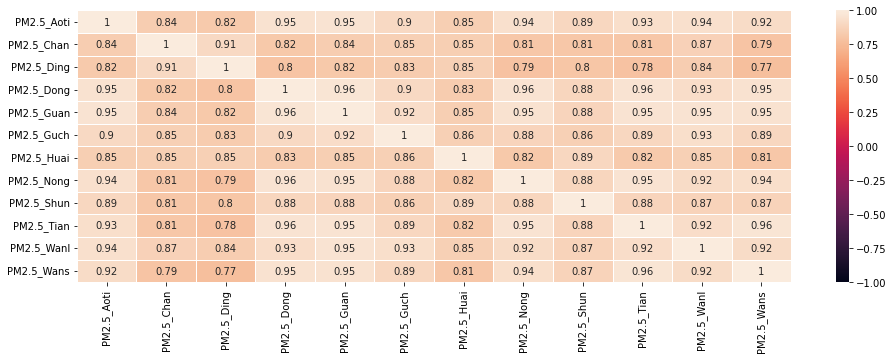

In [22]:
pear_corr = PM_25_df.corr(method='pearson')

import seaborn as sb

plt.figure(figsize = (16,5))
sb.heatmap(pear_corr,
           vmin=-1,
           vmax=1,
           xticklabels=pear_corr.columns,
           yticklabels=pear_corr.columns, 
           annot=True, 
           linewidth=0.5)

### 3.5) Feature selection
PM2.5 of all stations and CO, PM10, WSPM, wd, RAIN, DEWP, PRES, TEMP of `Aotizhongxin station`

In [23]:
# Concatenate scaled data
frames = [scaled_data_Aotizhongxin[['CO', 'PM10', 'WSPM', 'RAIN', 'DEWP', 'PRES', 'TEMP', 'wd']],
          scaled_stations_PM_25]

final_dataset = pd.concat(frames, axis=1)
final_dataset

,CO,PM10,WSPM,RAIN,DEWP,PRES,TEMP,wd,PM2.5_Aoti,PM2.5_Chan,PM2.5_Ding,PM2.5_Dong,PM2.5_Guan,PM2.5_Guch,PM2.5_Huai,PM2.5_Nong,PM2.5_Shun,PM2.5_Tian,PM2.5_Wanl,PM2.5_Wans
year_month_day_hour,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,0.020202,0.002037,0.392857,0.0,0.258621,0.661319,0.280977,1.000000,0.001117,0.001136,0.001139,0.008174,0.002950,0.005208,0.006579,0.003563,0.001065,0.003667,0.006283,0.006024
2013-03-01 01:00:00,0.020202,0.006110,0.419643,0.0,0.268025,0.664884,0.273997,0.000000,0.005587,0.001136,0.004556,0.001362,0.002950,0.005208,0.002632,0.007126,0.010650,0.003667,0.007330,0.008032
2013-03-01 02:00:00,0.020202,0.005092,0.500000,0.0,0.268025,0.670232,0.273997,1.000000,0.004469,0.001136,0.002278,0.005450,0.001475,0.003906,0.002632,0.001188,0.012780,0.003667,0.001047,0.005020
2013-03-01 03:00:00,0.020202,0.004073,0.276786,0.0,0.249216,0.688057,0.268761,0.933333,0.003352,0.001136,0.003417,0.000000,0.001475,0.005208,0.001316,0.003563,0.010650,0.003667,0.009424,0.005020
2013-03-01 04:00:00,0.020202,0.001018,0.178571,0.0,0.247649,0.700535,0.258290,0.000000,0.000000,0.001136,0.002278,0.000000,0.001475,0.003906,0.001316,0.003563,0.010650,0.002445,0.001047,0.005020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,0.030303,0.027495,0.214286,0.0,0.299373,0.491979,0.511344,0.933333,0.010056,0.029545,0.009112,0.017711,0.016224,0.015625,0.018421,0.014252,0.026624,0.020782,0.009424,0.008032
2017-02-28 20:00:00,0.040404,0.035642,0.080357,0.0,0.316614,0.493761,0.495637,0.866667,0.011173,0.011364,0.011390,0.020436,0.026549,0.032552,0.025000,0.019002,0.047923,0.009780,0.013613,0.010040
2017-02-28 21:00:00,0.060606,0.035642,0.098214,0.0,0.344828,0.504456,0.481675,0.933333,0.014525,0.005682,0.006834,0.027248,0.020649,0.026042,0.019737,0.015439,0.017039,0.018337,0.011518,0.011044


In [24]:
# save to csv file
pd.DataFrame.to_csv(final_dataset, 'feature_result.csv', index=False)

### 3.6) Supervised dataset

In [25]:
final_dataset.head()

,CO,PM10,WSPM,RAIN,DEWP,PRES,TEMP,wd,PM2.5_Aoti,PM2.5_Chan,PM2.5_Ding,PM2.5_Dong,PM2.5_Guan,PM2.5_Guch,PM2.5_Huai,PM2.5_Nong,PM2.5_Shun,PM2.5_Tian,PM2.5_Wanl,PM2.5_Wans
year_month_day_hour,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,0.020202,0.002037,0.392857,0.0,0.258621,0.661319,0.280977,1.000000,0.001117,0.001136,0.001139,0.008174,0.002950,0.005208,0.006579,0.003563,0.001065,0.003667,0.006283,0.006024
2013-03-01 01:00:00,0.020202,0.006110,0.419643,0.0,0.268025,0.664884,0.273997,0.000000,0.005587,0.001136,0.004556,0.001362,0.002950,0.005208,0.002632,0.007126,0.010650,0.003667,0.007330,0.008032
2013-03-01 02:00:00,0.020202,0.005092,0.500000,0.0,0.268025,0.670232,0.273997,1.000000,0.004469,0.001136,0.002278,0.005450,0.001475,0.003906,0.002632,0.001188,0.012780,0.003667,0.001047,0.005020
2013-03-01 03:00:00,0.020202,0.004073,0.276786,0.0,0.249216,0.688057,0.268761,0.933333,0.003352,0.001136,0.003417,0.000000,0.001475,0.005208,0.001316,0.003563,0.010650,0.003667,0.009424,0.005020
2013-03-01 04:00:00,0.020202,0.001018,0.178571,0.0,0.247649,0.700535,0.258290,0.000000,0.000000,0.001136,0.002278,0.000000,0.001475,0.003906,0.001316,0.003563,0.010650,0.002445,0.001047,0.005020


In [26]:
# transfer dataframe to matrix values
dataset_value = final_dataset.values

In [27]:
dataset_value

array([[0.02020202, 0.00203666, 0.39285714, ..., 0.00366748, 0.00628272,
        0.0060241 ],
       [0.02020202, 0.00610998, 0.41964286, ..., 0.00366748, 0.00732984,
        0.00803213],
       [0.02020202, 0.00509165, 0.5       , ..., 0.00366748, 0.00104712,
        0.00502008],
       ...,
       [0.06060606, 0.03564155, 0.09821429, ..., 0.01833741, 0.01151832,
        0.01104418],
       [0.06060606, 0.04276986, 0.10714286, ..., 0.01466993, 0.0104712 ,
        0.00903614],
       [0.05050505, 0.02953157, 0.11607143, ..., 0.01466993, 0.0052356 ,
        0.01004016]])

In [28]:
PM25_Aotizhongxin = scaled_data_Aotizhongxin['PM2.5'].values.reshape(-1, 1)
PM25_Aotizhongxin

array([[0.00111732],
       [0.00558659],
       [0.00446927],
       ...,
       [0.01452514],
       [0.02011173],
       [0.01787709]])

In [29]:
final_dataset.isnull().values.any()

False

#### With lag = 1

In [30]:
lag = 1 * 24 # 1 day lag

x_1 = []
y_1 = []

for i in range(lag, len(PM25_Aotizhongxin)):
    x_1.append(dataset_value[i-lag:i,:])
    y_1.append(PM25_Aotizhongxin[i,0:1])
    
X = np.array(x_1)
Y = np.array(y_1)

# split to test and train dataset
n_train = 28052
X_train_1, X_test_1 = X[:n_train,] , X[n_train:,]
Y_train_1, Y_test_1 = Y[:n_train,] , Y[n_train:,]

In [31]:
lag_1_input_shape = (X_train_1.shape[1], X_train_1.shape[2])
print('X_train :' ,X_train_1.shape)
print('Y_train :' ,Y_train_1.shape)
print('X_test :' ,X_test_1.shape)
print('Y_test :' ,Y_test_1.shape)

X_train : (28052, 24, 20)
Y_train : (28052, 1)
X_test : (6988, 24, 20)
Y_test : (6988, 1)


#### With lag = 7

In [32]:
lag = 7 * 24 # 7 day lag

x_7 = []
y_7 = []

for i in range(lag, len(PM25_Aotizhongxin)):
    x_7.append(dataset_value[i-lag:i,:])
    y_7.append(PM25_Aotizhongxin[i,0:1])
    
X = np.array(x_7)
Y = np.array(y_7)

# split to test and train dataset
n_train = 28052
X_train_7, X_test_7 = X[:n_train,] , X[n_train:,]
Y_train_7, Y_test_7 = Y[:n_train,] , Y[n_train:,]

In [33]:
lag_7_input_shape = (X_train_7.shape[1], X_train_7.shape[2])
print('X_train :' ,X_train_7.shape)
print('Y_train :' ,Y_train_7.shape)
print('X_test :' ,X_test_7.shape)
print('Y_test :' ,Y_test_7.shape)

X_train : (28052, 168, 20)
Y_train : (28052, 1)
X_test : (6844, 168, 20)
Y_test : (6844, 1)


# Define Model (CNN-LSTM)

In [34]:
def CNN_LSTM(input_shape):
    
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=input_shape))
    
    # Convolutional Block
    model.add(Conv1D(filters=64 , kernel_size=3 , padding='causal' , activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=64 , kernel_size=3 , padding='causal' , activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters=32 , kernel_size=3 , padding='causal' , activation='relu'))
    model.add(MaxPooling1D(pool_size=3))
    
    # Recurrent Block
    model.add(LSTM(units = 100, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.3))
    
    # Output (Regression) layer
    model.add(Dense(units = 1 , activation='relu'))
    
    return model

##### model for lag 1

In [35]:
lag_1_model = CNN_LSTM(lag_1_input_shape)
lag_1_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 64)            3904      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 64)            12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 24, 32)            6176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 8, 100)            5

##### model for lag 7

In [36]:
lag_7_model = CNN_LSTM(lag_7_input_shape)
lag_7_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 168, 64)           3904      
_________________________________________________________________
batch_normalization_2 (Batch (None, 168, 64)           256       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 168, 64)           12352     
_________________________________________________________________
batch_normalization_3 (Batch (None, 168, 64)           256       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 168, 32)           6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 56, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 56, 100)          

# Train the model

### Coefficient Determination ($R^2$) impelementation

In [37]:
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [38]:
def train_model(model, X_train, y_train, X_test, y_test, loss, epochs = 25, batch_size = 32):
    
    # Compile model
    opt = Adam(learning_rate=0.0001)
    model.compile(loss = loss, 
                  optimizer = opt,
                  metrics = [mean_absolute_error,
                             mean_squared_error,
                             r2_score
                            ]
                 ) 

    # Callbacks
    tensorboard_callback = TensorBoard(log_dir=f"./logs_{loss}")
    model_checkpoint_callback = ModelCheckpoint(filepath=f"./checkpoint_{loss}",
                                                verbose=1, 
                                                save_best_only=True,
#                                                 save_weights_only=True, 
                                                monitor='val_accuracy', 
                                                mode='max'
                                               )
    earlyStopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max',)
    
    # Fitting the model on the training set
    history = model.fit(X_train, y_train, 
                        epochs = epochs, 
                        batch_size = batch_size, 
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        validation_data = (X_test,y_test), 
#                         callbacks = [tensorboard_callback, model_checkpoint_callback, earlyStopping_callback]
                       )
    
    return history

## Plot History


In [39]:
def plot_history(model, history, loss):
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title(f'{loss} loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='best')
    plt.show()
    
    # summarize history for metrics
    plt.plot(history.history['mean_squared_error'], history.history['mean_absolute_error'], history.history['r2_score'])
    plt.title(f'Train Metrics plot with {loss} loss for each epoch')
    plt.ylabel('Metric')
    plt.xlabel('epoch')
    plt.legend(['mean_squared_error', 'mean_absolute_error', 'RSquare'], loc='best')
    plt.show()
    
    # summarize history for metrics
    plt.plot(history.history['val_mean_squared_error'], history.history['val_mean_absolute_error'], history.history['val_r2_score'])
    plt.title(f'Test Metrics plot with {loss} loss for each epoch')
    plt.ylabel('Metric')
    plt.xlabel('epoch')
    plt.legend(['val_mean_squared_error', 'val_mean_absolute_error', 'val_RSquare'], loc='best')
    plt.show()
    
def test_data(model, X_test, Y_test):
    
    # for test data
    Y_pred = model.predict(X_test)
    
#     #Calculate error mse, mae, R^2 for test data
#     mse = mean_squared_error(Y_test, Y_pred)
#     mae = mean_absolute_error(Y_test, Y_pred)
#     R_2 = r2_score(Y_test, Y_pred)
#     print("for Test data: ")
#     print("mean square error is : ", mse)
#     print("mean absolute error is : ", mae)
#     print("coeff determination is : ", R_2)
   

    #Plot the graph between actual vs predicted values
    plt.plot(Y_pred[:200,:], color= 'blue')
    plt.plot(Y_test[:200,:], color = 'red')
    plt.xlabel("Days")
    plt.ylabel("Pollution level")
    plt.legend(['pred', 'test'], loc='best')
    plt.show()

### train with lag = 7 and loss = MAE

Epoch 1/25
876/876 [==============================] - 17s 14ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_squared_error: 0.0087 - r2_score: -0.2033 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353 - val_mean_squared_error: 0.0030 - val_r2_score: -1.5763
Epoch 2/25
876/876 [==============================] - 13s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_squared_error: 0.0034 - r2_score: 0.5239 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297 - val_mean_squared_error: 0.0020 - val_r2_score: -0.7309
Epoch 3/25
876/876 [==============================] - 12s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_squared_error: 0.0022 - r2_score: 0.6929 - val_loss: 0.0239 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0013 - val_r2_score: -0.1489
Epoch 4/25
876/876 [==============================] - 13s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_squared_error: 0.0016 - r2_score: 0.7749 - val_loss: 0.0194 - val_

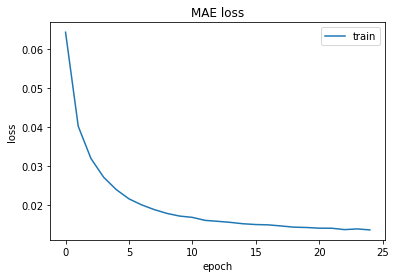

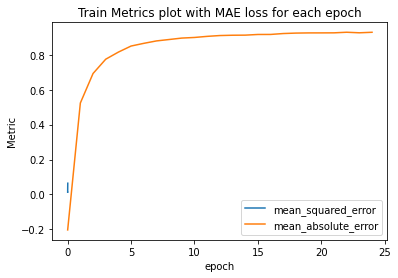

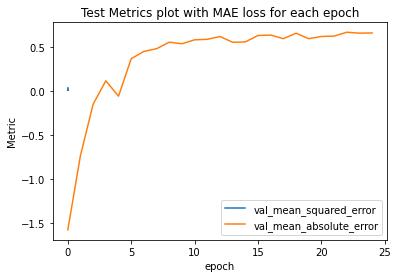

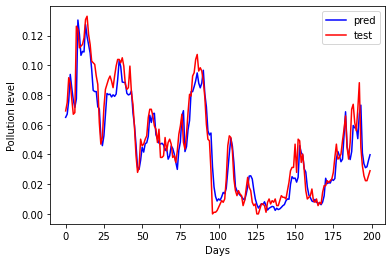

In [40]:
history_mae_7 = train_model(lag_7_model, X_train=X_train_7, y_train=Y_train_7, X_test=X_test_7, y_test=Y_test_7, loss='mae')

plot_history(lag_7_model, history_mae_7, 'MAE')
test_data(lag_7_model, X_test=X_test_7, Y_test=Y_test_7)

### train with lag = 7 and loss = MSE

Epoch 1/25
876/876 [==============================] - 15s 14ms/step - loss: 5.1997e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 5.1997e-04 - r2_score: 0.9309 - val_loss: 3.7655e-04 - val_mean_absolute_error: 0.0117 - val_mean_squared_error: 3.7655e-04 - val_r2_score: 0.6488
Epoch 2/25
876/876 [==============================] - 11s 13ms/step - loss: 5.0725e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 5.0725e-04 - r2_score: 0.9322 - val_loss: 4.3886e-04 - val_mean_absolute_error: 0.0139 - val_mean_squared_error: 4.3886e-04 - val_r2_score: 0.4177
Epoch 3/25
876/876 [==============================] - 12s 14ms/step - loss: 5.0648e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 5.0648e-04 - r2_score: 0.9308 - val_loss: 4.5966e-04 - val_mean_absolute_error: 0.0132 - val_mean_squared_error: 4.5966e-04 - val_r2_score: 0.6000
Epoch 4/25
876/876 [==============================] - 13s 14ms/step - loss: 4.8571e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 4.8

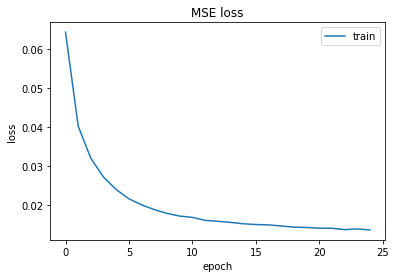

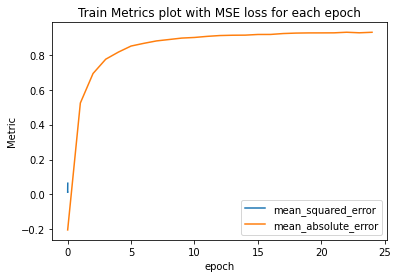

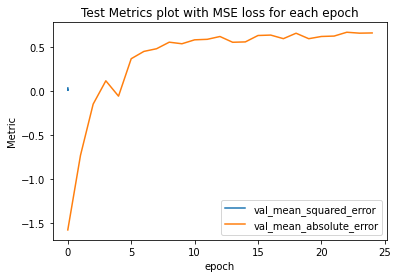

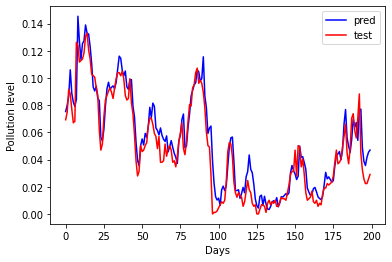

In [41]:
history_mse_7 = train_model(lag_7_model, X_train=X_train_7, y_train=Y_train_7, X_test=X_test_7, y_test=Y_test_7, loss='mse')

plot_history(lag_7_model, history_mae_7, 'MSE')
test_data(lag_7_model, X_test=X_test_7, Y_test=Y_test_7)

### train with lag = 1 and loss = MAE

Epoch 1/25
876/876 [==============================] - 12s 11ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_squared_error: 0.0062 - r2_score: 0.1370 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347 - val_mean_squared_error: 0.0029 - val_r2_score: -1.7274
Epoch 2/25
876/876 [==============================] - 9s 10ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_squared_error: 0.0031 - r2_score: 0.5806 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_squared_error: 0.0022 - val_r2_score: -0.8267
Epoch 3/25
876/876 [==============================] - 9s 11ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_squared_error: 0.0022 - r2_score: 0.7018 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252 - val_mean_squared_error: 0.0015 - val_r2_score: -0.3252
Epoch 4/25
876/876 [==============================] - 10s 11ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_squared_error: 0.0018 - r2_score: 0.7595 - val_loss: 0.0213 - val_mea

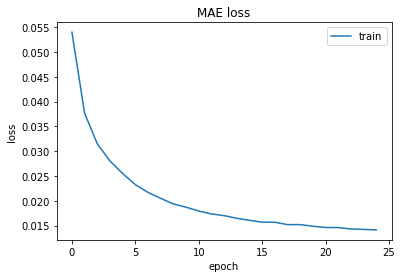

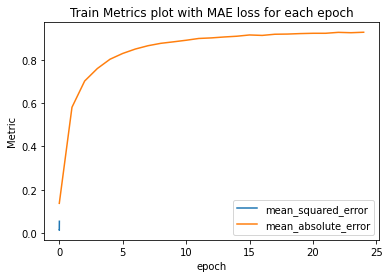

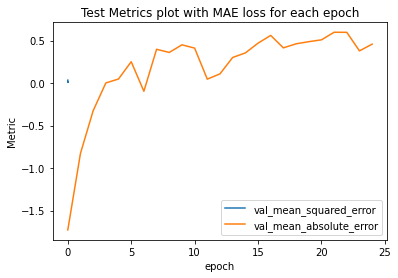

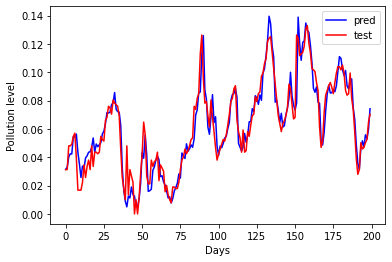

In [42]:
history_mae_1 = train_model(lag_1_model, X_train=X_train_1, y_train=Y_train_1, X_test=X_test_7, y_test=Y_test_7, loss='mae')

plot_history(lag_1_model, history_mae_1, 'MAE')
test_data(lag_7_model, X_test=X_test_1, Y_test=Y_test_1)

### train with lag = 1 and loss = MSE

Epoch 1/25
876/876 [==============================] - 12s 11ms/step - loss: 5.4610e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 5.4610e-04 - r2_score: 0.9268 - val_loss: 4.1857e-04 - val_mean_absolute_error: 0.0126 - val_mean_squared_error: 4.1857e-04 - val_r2_score: 0.6002
Epoch 2/25
876/876 [==============================] - 9s 10ms/step - loss: 5.3760e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 5.3760e-04 - r2_score: 0.9284 - val_loss: 4.4413e-04 - val_mean_absolute_error: 0.0132 - val_mean_squared_error: 4.4413e-04 - val_r2_score: 0.5860
Epoch 3/25
876/876 [==============================] - 9s 10ms/step - loss: 5.1893e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 5.1893e-04 - r2_score: 0.9306 - val_loss: 4.2791e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 4.2791e-04 - val_r2_score: 0.5721
Epoch 4/25
876/876 [==============================] - 9s 11ms/step - loss: 4.9747e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 4.9747

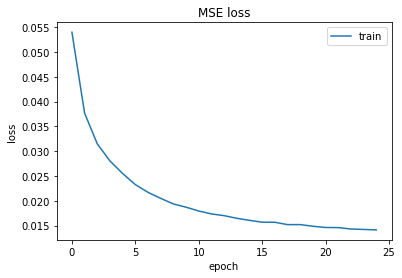

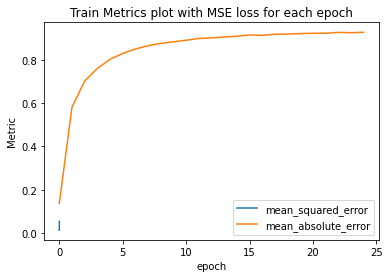

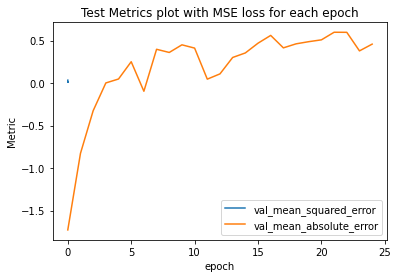

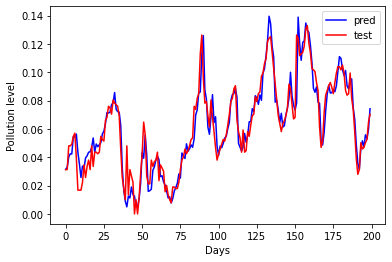

In [43]:
history_mse_1 = train_model(lag_1_model, X_train=X_train_1, y_train=Y_train_1, X_test=X_test_1, y_test=Y_test_1, loss='mse')


plot_history(lag_1_model, history_mae_1, 'MSE')
test_data(lag_7_model, X_test=X_test_1, Y_test=Y_test_1)